# Classificação de TEPT ou não-TEPT dos cérebros durante o Real_Mut

## Importação das bibliotecas

In [10]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Exemplo de dado de um indivíduo

In [11]:
test_load = nib.load(r"C:\Users\mathe\Downloads\Dados de fMRI\Pct\P048_DESIGN MATRIX\beta_0002.nii")
print(test_load.shape)  #formato do dado  

(53, 63, 52)


In [12]:
print(test_load.get_data_dtype())  #tipo do dado

float32


## Corte axial

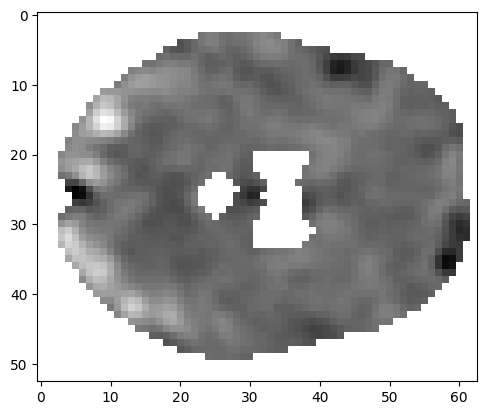

In [13]:
plt.imshow(test_load.get_fdata()[:, :, 25], cmap = 'gray')
plt.show()

## Visualização da matriz 3d

In [14]:
image_data = test_load.get_fdata()
print(image_data[10:18:, 10:18, 10:18])

[[[        nan         nan         nan         nan         nan
           nan         nan         nan]
  [        nan         nan         nan         nan         nan
           nan         nan         nan]
  [        nan         nan         nan         nan         nan
           nan         nan         nan]
  [        nan         nan         nan         nan         nan
           nan         nan  1.07645977]
  [        nan         nan         nan         nan         nan
           nan         nan  1.79124975]
  [        nan         nan         nan         nan -0.51437891
    0.03615936  1.40232563  2.59572721]
  [        nan         nan  0.18134004 -0.23760778 -0.46513209
    0.12157704  1.59650505  3.07334518]
  [        nan         nan  0.2748946  -0.15359783 -0.45358595
    0.02622955  1.32717979  2.76348448]]

 [[        nan         nan         nan         nan         nan
           nan         nan         nan]
  [        nan         nan         nan         nan         nan
        

In [15]:
missing_points_mask = np.isnan(image_data)
missing_points_count = np.sum(missing_points_mask)
print("Number of missing points:", missing_points_count)

Number of missing points: 116306


## Corte sagital

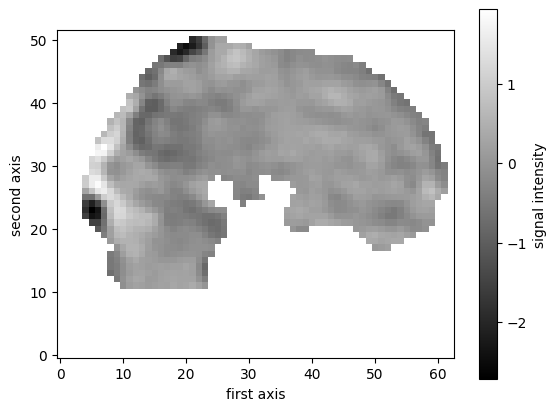

In [16]:
mid_slice_x = image_data[24, :, :]

plt.imshow(mid_slice_x.T, cmap = 'gray', origin = 'lower')
plt.xlabel('first axis')
plt.ylabel('second axis')
plt.colorbar(label = 'signal intensity')
plt.show()

## Preparação dos dados para o Random Forest

In [17]:
import os


def join_nii_files(file_name_pattern, parent_directory):


    subdirectories = [d for d in os.listdir(parent_directory) if os.path.isdir(os.path.join(parent_directory, d))]

    individual_data = []

    for subdirectory in subdirectories:
        file_path = os.path.join(parent_directory, subdirectory, file_name_pattern)
        data_raw = nib.load(file_path)
        data = data_raw.get_fdata()
        data_flattened = data.flatten()  #convert 3d-array into a flattened 1d-array
        individual_data.append(data_flattened)
    
    return individual_data

joined_data = np.concatenate((join_nii_files("beta_0002.nii", "C:\\Users\\mathe\\Downloads\\Dados de fMRI\\Pct"),
                            join_nii_files("beta_0011.nii", "C:\\Users\\mathe\\Downloads\\Dados de fMRI\\Pct"),
                            join_nii_files("beta_0002.nii", "C:\\Users\\mathe\\Downloads\\Dados de fMRI\\Cont"),
                            join_nii_files("beta_0011.nii", "C:\\Users\\mathe\\Downloads\\Dados de fMRI\\Cont")), axis=0)


print(joined_data.shape)

brain_valid_data = np.nan_to_num(joined_data, nan=0)   #Replace all the NaN values with 0's

label = np.concatenate((np.ones(38), np.zeros(44)))

(82, 173628)


## Treinamento do Modelo

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200)

rf.fit(brain_valid_data, label)

RandomForestClassifier(n_estimators=200)

## Classficação do dado de teste

In [28]:
test_load1 = nib.load(r"C:\Users\mathe\Downloads\Dados de fMRI\test_data\Pct\P034_DESIGN MATRIX\beta_0011.nii")
test_data1 = test_load1.get_fdata()
test_data_flattened1 = test_data1.flatten()
test_data_flattened_valid = np.nan_to_num(test_data_flattened1, nan = 0)
test_reshaped = test_data_flattened_valid.reshape(1, -1)
print(test_reshaped.shape)

y_pred = rf.predict(test_reshaped)

(1, 173628)


## Resultado

In [29]:
y_pred

array([0.])

In [30]:
if (y_pred == 1):
    print("Paciente com TEPT")
else:
    print("Paciente sem TEPT")

Paciente sem TEPT
